This notebook analyzes **seller churn risk from the buyer perspective** using transaction and behavior data from the Olist marketplace.  
Because direct seller churn labels are not available, buyer experience is used as an **early warning proxy** to evaluate whether sellers are losing competitiveness on the platform.

The core assumption is:

Buyer dissatisfaction  
→ declining demand  
→ weakening seller performance  
→ potential seller churn

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as ms


# **Load Dataset**

In [2]:
base_dir = "E:\BUTCAMP\FINPRO\DATASET\\"
buyer_df = pd.read_csv(base_dir + "buyer_.csv")

<>:1: SyntaxWarning: invalid escape sequence '\B'
<>:1: SyntaxWarning: invalid escape sequence '\B'
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_5024\3341159352.py:1: SyntaxWarning: invalid escape sequence '\B'
  base_dir = "E:\BUTCAMP\FINPRO\DATASET\\"


In [3]:
pd.set_option('display.max_colwidth', None)

In [4]:
buyer_df

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name_english,customer_id,order_status,...,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,geolocation_city,geolocation_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,3ce436f183e68e07877b285a838db11a,delivered,...,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03,1.0,credit_card,2.0,72.19,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,f6dd3ec061db4e3987629fe6b26e5cce,delivered,...,NaN,NaN,2017-05-13 00:00:00,2017-05-15 11:34:13,1.0,credit_card,3.0,259.83,santa fe do sul,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,furniture_decor,6489ae5e4333f3693df5ad4372dab6d3,delivered,...,NaN,Chegou antes do prazo previsto e o produto surpreendeu pela qualidade. Muito satisfatório.,2018-01-23 00:00:00,2018-01-23 16:06:31,1.0,credit_card,5.0,216.87,para de minas,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumery,d4eb9395c8c0431ee92fce09860c5a06,delivered,...,NaN,NaN,2018-08-15 00:00:00,2018-08-15 16:39:01,1.0,credit_card,2.0,25.78,atibaia,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,garden_tools,58dbd0b2d70206bf40e62cd34e84d795,delivered,...,NaN,Gostei pois veio no prazo determinado .,2017-03-02 00:00:00,2017-03-03 10:54:59,1.0,credit_card,3.0,218.04,varzea paulista,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118305,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,housewares,b51593916b4b8e0d6f66f2ae24f2673d,delivered,...,NaN,NaN,2018-05-11 00:00:00,2018-05-14 12:53:47,1.0,boleto,1.0,343.40,sao luis,MA
118306,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,computers_accessories,84c5d4fbaf120aae381fad077416eaa0,delivered,...,NaN,NaN,2018-07-24 00:00:00,2018-07-25 09:25:29,1.0,boleto,1.0,386.53,curitiba,PR
118307,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,sports_leisure,29309aa813182aaddc9b259e31b870e6,delivered,...,NaN,NaN,2017-10-29 00:00:00,2017-10-29 21:33:52,1.0,credit_card,3.0,116.85,sao paulo,SP
118308,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,computers_accessories,b5e6afd5a41800fdf401e0272ca74655,delivered,...,NaN,Recebi o produto antes do prazo e corretamente.,2017-08-17 00:00:00,2017-08-18 12:24:05,1.0,credit_card,3.0,64.71,vinhedo,SP


In [5]:
buyer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118310 entries, 0 to 118309
Data columns (total 31 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       118310 non-null  object 
 1   order_item_id                  118310 non-null  int64  
 2   product_id                     118310 non-null  object 
 3   seller_id                      118310 non-null  object 
 4   shipping_limit_date            118310 non-null  object 
 5   price                          118310 non-null  float64
 6   freight_value                  118310 non-null  float64
 7   product_category_name_english  116576 non-null  object 
 8   customer_id                    118310 non-null  object 
 9   order_status                   118310 non-null  object 
 10  order_purchase_timestamp       118310 non-null  object 
 11  order_approved_at              118295 non-null  object 
 12  order_delivered_carrier_date  

In [6]:
buyer_df.shape

(118310, 31)

In [7]:
datetime_columns = [
    'shipping_limit_date',
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date'
]

for col in datetime_columns:
    buyer_df[col] = pd.to_datetime(buyer_df[col])

In [8]:
buyer_df.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value',
       'product_category_name_english', 'customer_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'geolocation_city',
       'geolocation_state'],
      dtype='object')

In [9]:
buyer_df=buyer_df.drop(columns=[
    'review_id',
    'order_item_id',
    'payment_sequential',
    'shipping_limit_date',
    'order_approved_at',
    'order_delivered_carrier_date',
    'review_answer_timestamp',
    'review_comment_message',
    'review_comment_title'
])

In [10]:
buyer_df

,order_id,product_id,seller_id,price,freight_value,product_category_name_english,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,...,customer_zip_code_prefix,customer_city,customer_state,review_score,review_creation_date,payment_type,payment_installments,payment_value,geolocation_city,geolocation_state
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29,cool_stuff,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-20 23:43:48,...,28013,campos dos goytacazes,RJ,5.0,2017-09-21 00:00:00,credit_card,2.0,72.19,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93,pet_shop,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-05-12 16:04:24,...,15775,santa fe do sul,SP,4.0,2017-05-13 00:00:00,credit_card,3.0,259.83,santa fe do sul,SP
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87,furniture_decor,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-22 13:19:16,...,35661,para de minas,MG,5.0,2018-01-23 00:00:00,credit_card,5.0,216.87,para de minas,MG
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79,perfumery,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-14 13:32:39,...,12952,atibaia,SP,4.0,2018-08-15 00:00:00,credit_card,2.0,25.78,atibaia,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14,garden_tools,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-03-01 16:42:31,...,13226,varzea paulista,SP,5.0,2017-03-02 00:00:00,credit_card,3.0,218.04,varzea paulista,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118305,fffc94f6ce00a00581880bf54a75a037,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,299.99,43.41,housewares,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:06,2018-05-10 22:56:40,...,65077,sao luis,MA,5.0,2018-05-11 00:00:00,boleto,1.0,343.40,sao luis,MA
118306,fffcd46ef2263f404302a634eb57f7eb,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,350.00,36.53,computers_accessories,84c5d4fbaf120aae381fad077416eaa0,delivered,2018-07-14 10:26:46,2018-07-23 20:31:55,...,81690,curitiba,PR,5.0,2018-07-24 00:00:00,boleto,1.0,386.53,curitiba,PR
118307,fffce4705a9662cd70adb13d4a31832d,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,99.90,16.95,sports_leisure,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,2017-10-28 12:22:22,...,4039,sao paulo,SP,5.0,2017-10-29 00:00:00,credit_card,3.0,116.85,sao paulo,SP
118308,fffe18544ffabc95dfada21779c9644f,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,55.99,8.72,computers_accessories,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-14 23:02:59,2017-08-16 21:59:40,...,13289,vinhedo,SP,5.0,2017-08-17 00:00:00,credit_card,3.0,64.71,vinhedo,SP


In [11]:
buyer_df.isna().sum()

order_id                            0
product_id                          0
seller_id                           0
price                               0
freight_value                       0
product_category_name_english    1734
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_delivered_customer_date    2588
order_estimated_delivery_date       0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
review_score                      978
review_creation_date              978
payment_type                        3
payment_installments                3
payment_value                       3
geolocation_city                  317
geolocation_state                 317
dtype: int64

# **Handling Missing Value**

In [12]:
# 1. Product Category
buyer_df['product_category_name_english'] = \
    buyer_df['product_category_name_english'].fillna('unknown')

# 2. Delivery Status Flag
buyer_df['is_delivered'] = \
    buyer_df['order_delivered_customer_date'].notna()

# 3. Review Handling
buyer_df['review_score'] = buyer_df['review_score'].fillna(0)

# flag apakah buyer memberi review
buyer_df['has_review'] = buyer_df['review_score'] > 0

# tanggal review tetap NaT (tidak diimputasi)
buyer_df['review_creation_date'] = \
    buyer_df['review_creation_date'].fillna(pd.NaT)

# 4. Payment Information
buyer_df['payment_type'] = \
    buyer_df['payment_type'].fillna('unknown')

buyer_df['payment_installments'] = \
    buyer_df['payment_installments'].fillna(0)

buyer_df['payment_value'] = \
    buyer_df['payment_value'].fillna(0)

# 5. Geolocation
buyer_df['geolocation_city'] = \
    buyer_df['geolocation_city'].fillna('unknown')

buyer_df['geolocation_state'] = \
    buyer_df['geolocation_state'].fillna('unknown')

buyer_df.isna().sum()

order_id                            0
product_id                          0
seller_id                           0
price                               0
freight_value                       0
product_category_name_english       0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_delivered_customer_date    2588
order_estimated_delivery_date       0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
review_score                        0
review_creation_date              978
payment_type                        0
payment_installments                0
payment_value                       0
geolocation_city                    0
geolocation_state                   0
is_delivered                        0
has_review                          0
dtype: int64

## **Missing Value Handling and Feature Flags**

The missing value treatment was performed based on business logic to ensure that the dataset remains analytically reliable and suitable for studying the impact of buyer behavior on seller churn.

### 1. Product Category  
- Missing values in `product_category_name_english` were replaced with `"unknown"`.  
- This column is categorical, therefore label replacement does not distort numerical analysis.

### 2. Delivery Information  
- Missing `order_delivered_customer_date` represents orders that are not yet delivered or canceled.  
- These values were intentionally **not imputed** to preserve real transactional meaning.  
- A new indicator variable was created:

  - `is_delivered` → identifies whether the order has reached the customer.

### 3. Review Data  
- Empty `review_score` was filled with `0`, representing that the buyer did not provide a review.  
- A behavioral flag was added:

  - `has_review` → True if buyer left a review, False otherwise.

- `review_creation_date` remains as NaT because the absence of a date reflects real user behavior, not a data error.

### 4. Payment Information  
- Only a few records contained missing payment data.  
- The following strategy was applied:
  - `payment_type` → filled with `"unknown"`  
  - `payment_installments` → filled with `0`  
  - `payment_value` → filled with `0`

### 5. Geolocation  
- Missing location data was replaced with `"unknown"` for both:
  - `geolocation_city`  
  - `geolocation_state`

### Cleaning Principles

- Categorical fields → replaced with `"unknown"`  
- Numerical fields → replaced with `0`  
- Datetime fields → kept as NaT to avoid analytical bias  
- Behavioral meaning → captured through new flags (`is_delivered`, `has_review`)

This approach ensures that the dataset reflects real buyer behavior and can be reliably used to analyze how buyer experience influences seller churn in the Olist marketplace.

## Treatment of Remaining Missing Values

After the cleaning process, two columns still contain missing values:

### 1. order_delivered_customer_date

- The missing values in this column are **not data errors**, but represent meaningful business conditions:
  - orders that have not yet been delivered  
  - canceled orders  
  - orders still in the fulfillment process at the time of data extraction  

- These values are intentionally **kept as NaT** to preserve the real transactional context.

- Instead of imputing artificial dates, a new flag was created:

  - `is_delivered` → identifies whether the order has reached the customer.

**Reasoning:**
Imputing fake dates would distort key analyses such as:
- delivery time calculation  
- late delivery detection  
- buyer satisfaction impact on seller performance  

### 2. review_creation_date

- Missing values indicate that the buyer **did not provide a review**.
- This is normal user behavior and carries analytical meaning.
- The absence of a review is already captured through:

  - `review_score = 0`  
  - `has_review` flag

**Reasoning:**
Filling this column with artificial dates would create misleading signals about buyer engagement.

### Analytical Approach

Both columns were left as NaT based on the following principles:

1. Missing values reflect real-world events, not data quality issues.  
2. Business meaning is preserved through additional indicator variables.  
3. Avoiding imputation prevents bias in:
   - delivery performance metrics  
   - buyer satisfaction analysis  
   - seller churn modeling.

This approach ensures that the dataset remains reliable for analyzing the influence of buyer behavior on seller churn without introducing artificial assumptions.

# **Buyer-Based Signal Analysis Framework for Seller Churn**

This analysis focuses on identifying early warning signals from buyer behavior that may indicate a risk of seller churn in the Olist marketplace. The objective is not to predict churn directly, but to understand how buyer experience can weaken seller sustainability.

### Analytical Perspective

Seller churn is viewed as the final consequence of a chain reaction starting from buyer experience:

Buyer dissatisfaction  
→ declining demand  
→ decreasing seller performance  
→ potential seller exit from the platform

### 1. Buyer Satisfaction Signal

Key question:  
*Does poor buyer experience reduce seller sustainability?*

Indicators used:
- `review_score`
- `has_review` flag  
- relationship between late delivery and review rating

Rationale:  
Low ratings and lack of reviews reduce seller credibility, visibility, and future demand, increasing the likelihood that the seller will stop using the platform.

### 2. Delivery Performance Signal

Key question:  
*Does delivery failure drive negative buyer behavior?*

Indicators used:
- `delivery_time`
- `is_late` flag
- proportion of undelivered orders

Rationale:  
Frequent delays or undelivered orders lead to dissatisfaction, refund requests, and negative perception toward the seller, which can gradually eliminate sales volume.

### 3. Repeat Buyer Signal

Key question:  
*Can sellers rely on returning customers?*

Indicators used:
- number of orders per `customer_unique_id`
- proportion of one-time buyers

Rationale:  
Sellers without repeat buyers depend solely on new traffic. This creates unstable revenue and increases the risk of leaving the platform.

### 4. Transaction Value Signal

Key question:  
*Is the economic value attractive enough for sellers?*

Indicators used:
- `total_value`
- distribution of order value

Rationale:  
Low transaction value combined with high logistics cost reduces seller margin, making the Olist platform less profitable.

### Expected Insight Flow

Late delivery  
→ lower review score  
→ fewer repeat buyers  
→ declining order value  
→ weakened seller performance  
→ potential seller churn

### Scope Limitation

This study analyzes seller churn **indirectly** from the buyer perspective only.  
No seller operational data is used. All conclusions are derived from buyer behavior and experience recorded in `buyer_df`.

---


## **Analysis 1 – Buyer Satisfaction Signal**

### Objective
To evaluate how buyer experience is reflected in review ratings and how late delivery affects satisfaction.

### Variables Used
- `is_late` – indicator of late delivery  
- `review_score` – buyer satisfaction proxy  
- `delivery_time` – actual delivery duration

### Analytical Logic
Late delivery → negative buyer experience → lower review score → declining seller reputation.

### Expected Pattern
- Average review score of late orders < on-time orders  
- Higher proportion of 1–2 star reviews in late deliveries  
- Longer delivery time associated with lower satisfaction

### Business Interpretation
If late delivery significantly reduces review scores, sellers with frequent delays will:
- lose buyer trust  
- receive fewer future orders  
- face higher risk of churn from the platform

### A. Average Review Score Based on Delivery Lateness

In [13]:
buyer_df['delivery_time'] = (
    buyer_df['order_delivered_customer_date'] -
    buyer_df['order_purchase_timestamp']
).dt.days

buyer_df['is_late'] = \
    buyer_df['order_delivered_customer_date'] > \
    buyer_df['order_estimated_delivery_date']

             mean   count
is_late                  
False    4.123332  109242
True     2.488972    9068


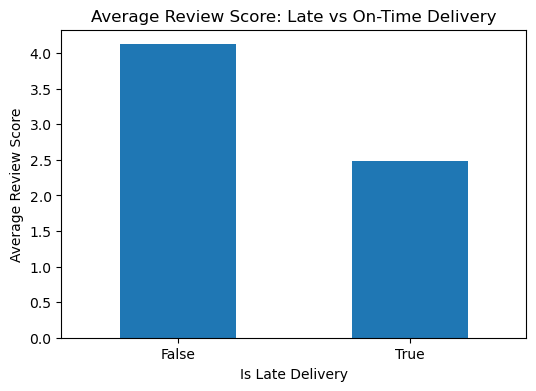

In [14]:

late_vs_review = buyer_df.groupby('is_late')['review_score'].agg([
    'mean','count'
])

print(late_vs_review)

plt.figure(figsize=(6,4))
late_vs_review['mean'].plot(kind='bar')

plt.title('Average Review Score: Late vs On-Time Delivery')
plt.xlabel('Is Late Delivery')
plt.ylabel('Average Review Score')
plt.xticks(rotation=0)

plt.show()

**Objective:**  
To compare the average review score between late and on-time deliveries.

**Result:**  
- On-time deliveries: **4.12** average review (n = 109,242)  
- Late deliveries: **2.49** average review (n = 9,068)

**Insight:**  
Late delivery reduces buyer satisfaction dramatically. The average rating drops by **1.63 points**, indicating that timeliness is a critical determinant of how buyers evaluate sellers. This decline can directly damage seller reputation and future demand.

### B. Distribution of Review Ratings


review_score       0.0       1.0       2.0       3.0       4.0       5.0
is_late                                                                 
False         0.007076  0.097957  0.031050  0.081104  0.194101  0.588711
True          0.022607  0.458315  0.076423  0.108072  0.119321  0.215262


<Figure size 800x400 with 0 Axes>

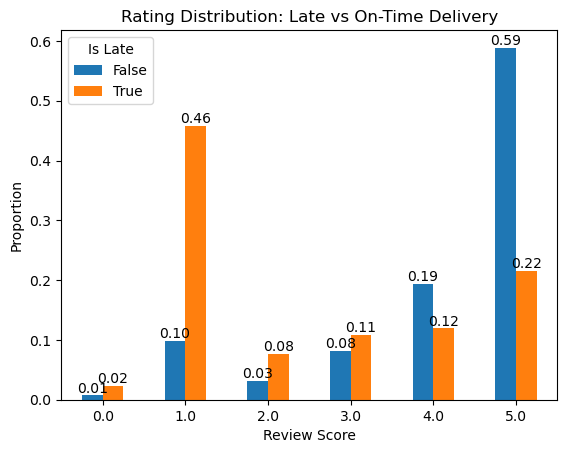

In [15]:
rating_dist = pd.crosstab(
    buyer_df['is_late'],
    buyer_df['review_score'],
    normalize='index'
)

print(rating_dist)

plt.figure(figsize=(8,4))

ax = rating_dist.T.plot(kind='bar')

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')

plt.title('Rating Distribution: Late vs On-Time Delivery')
plt.xlabel('Review Score')
plt.ylabel('Proportion')
plt.xticks(rotation=0)

plt.legend(title='Is Late')
plt.show()

**Objective:**  
To observe how the proportion of each rating score differs between late and on-time deliveries.

**Key Findings:**

- On-time deliveries:
  - 59% of orders receive **5-star** ratings  
  - Only 10% receive **1-star**

- Late deliveries:
  - Only 22% receive **5-star** ratings  
  - **46% receive 1-star**, the dominant category

**Insight:**  
Late delivery shifts buyer evaluation from highly positive to highly negative. The dominance of 1-star ratings in late orders shows that delays create strong dissatisfaction, which can discourage future purchases from the same seller.

#### **Overview**

This analysis evaluates how delivery performance influences buyer satisfaction using three perspectives:

1. Average review comparison  
2. Distribution of rating scores  
3. Correlation between delivery time and rating  

Main Findings

1. **Strong Difference in Average Rating**
   - On-time orders: 4.12  
   - Late orders: 2.49  
   - Satisfaction drops by 1.63 points when delivery is late.

2. **Shift in Rating Structure**
   - On-time deliveries are dominated by 5-star reviews (59%).  
   - Late deliveries are dominated by 1-star reviews (46%).  
   - Delays transform positive experience into negative evaluation.

3. **Statistical Relationship**
   - Correlation of -0.30 confirms that longer delivery time consistently lowers review scores.

Business Implication

From the buyer perspective:

Late delivery  
→ lower review score  
→ damaged seller reputation  
→ lower trust and repeat purchase  
→ declining seller performance

These results provide clear evidence that buyer experience, especially delivery punctuality, is a critical early signal explaining why sellers may lose competitiveness and eventually churn from the Olist platform.

---

## **Analysis 2 – Delivery Performance Signal**

### Objective
To understand whether long delivery duration creates dissatisfaction that can weaken seller performance.

### Variables Used
- `delivery_time`
- `is_delivered`
- `review_score`

### Analytical Focus
- Distribution of delivery time  
- Outliers with extremely long duration  
- Relationship between delivery time and review score

### Business Interpretation
Excessive delivery time indicates:
- operational problems on seller side  
- poor logistics coordination  
- higher chance of refund and complaint

These conditions reduce seller competitiveness and may trigger seller exit.

### A. Delivery Time Distribution

count    115722.000000
mean         12.022589
std           9.454922
min           0.000000
25%           6.000000
50%          10.000000
75%          15.000000
max         209.000000
Name: delivery_time, dtype: float64


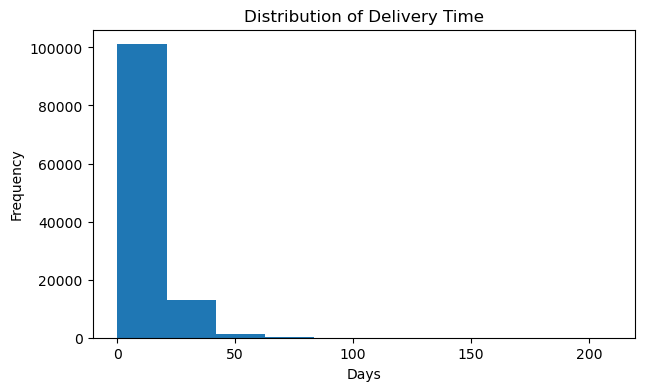

In [16]:
print(buyer_df['delivery_time'].describe())

plt.figure(figsize=(7,4))
buyer_df['delivery_time'].plot(kind='hist')

plt.title('Distribution of Delivery Time')
plt.xlabel('Days')
plt.ylabel('Frequency')

plt.show()

Objective:  
To observe the general pattern of delivery duration experienced by buyers.

Insight:  
Delivery time shows a wide spread with several extremely long durations.  
This indicates inconsistency in seller logistics performance, which can create dissatisfaction and negative evaluation.


### B. Outlier Risk

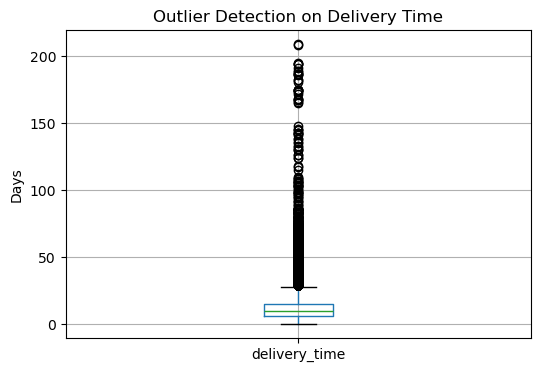

In [17]:
plt.figure(figsize=(6,4))
buyer_df.boxplot(column='delivery_time')

plt.title('Outlier Detection on Delivery Time')
plt.ylabel('Days')

plt.show()

Objective:  
To identify abnormal deliveries that are far above normal range.

Insight:  
Presence of extreme outliers reflects serious operational failures.  
Buyers experiencing these cases are highly likely to leave negative reviews and avoid the seller in the future.


### C. Correlation Between Delivery Time and Review Score

               delivery_time  review_score
delivery_time       1.000000     -0.302326
review_score       -0.302326      1.000000


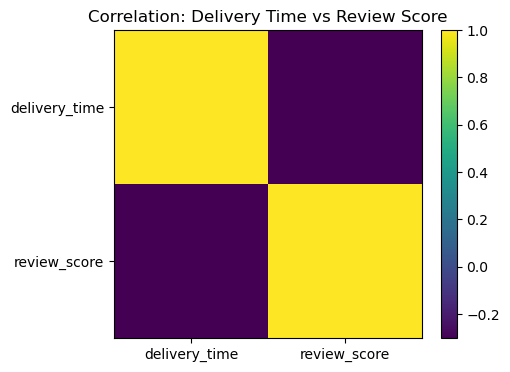

In [18]:
corr_delivery = buyer_df[['delivery_time','review_score']].corr()
print(corr_delivery)

plt.figure(figsize=(5,4))
plt.imshow(corr_delivery)
plt.colorbar()

plt.xticks(range(len(corr_delivery.columns)), corr_delivery.columns)
plt.yticks(range(len(corr_delivery.columns)), corr_delivery.columns)

plt.title('Correlation: Delivery Time vs Review Score')
plt.show()

**Objective:**  
To measure the relationship between actual delivery duration and buyer satisfaction.

**Result:**  
- Correlation coefficient: **-0.30**

**Insight:**  
There is a moderate negative correlation between delivery time and review score.  
This means:

- The longer the delivery time → the lower the rating  
- Faster delivery → higher probability of positive reviews  

Delivery speed is therefore a measurable and significant driver of buyer satisfaction.

---

#### **Overview**

This analysis evaluates how delivery duration acts as a risk signal for seller sustainability using three perspectives:

1. Distribution of delivery time  
2. Presence of extreme delivery outliers  
3. Relationship between delivery time and review score  

Main Findings

1. **High Variability in Delivery Duration**
   - Delivery time spreads widely across buyers  
   - A number of orders experience excessively long shipping duration  
   - Indicates inconsistency in seller logistics capability  

2. **Existence of Critical Outliers**
   - Several deliveries are far beyond normal range  
   - These extreme cases represent service failure  
   - Buyers exposed to such delays are highly likely to give negative feedback  

3. **Statistical Relationship**
   - Negative correlation between delivery time and review score  
   - Longer delivery consistently leads to lower buyer satisfaction  

Business Implication

From the buyer perspective:

Long delivery time  
→ lower review score  
→ perception of poor seller reliability  
→ higher complaint and refund risk  
→ weakening seller competitiveness  

These results confirm that delivery duration is a critical early warning signal explaining why sellers gradually lose performance and face potential churn from the Olist platform.

---



## **Analysis 3 – Repeat Buyer Signal**

### Objective
To evaluate whether sellers depend on sustainable buyer loyalty or only on one-time transactions.

### Variables Used
- `customer_unique_id`
- `order_id`
- `has_review`

### Analytical Logic
Number of orders per buyer is used as a proxy for loyalty.

### Expected Findings
- High proportion of one-time buyers → unstable demand  
- Sellers without repeat buyers are more vulnerable  
- Lack of reviews strengthens this negative signal

### Business Interpretation
Marketplace sellers survive when:
- buyers return  
- trust is built  
- experience is consistent

Absence of repeat buyers becomes an early indicator of potential churn.

### A. Repeat Buyers

order_id
1     0.849067
2     0.109893
3     0.021316
4     0.010228
5     0.003563
6     0.003196
7     0.000776
8     0.000493
12    0.000283
10    0.000272
Name: proportion, dtype: float64


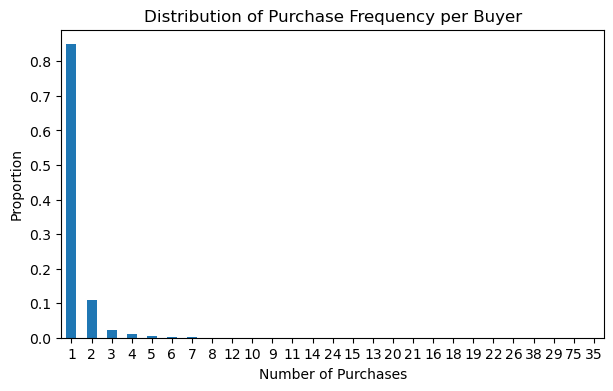

In [19]:
repeat = buyer_df.groupby('customer_unique_id')['order_id'].count()

repeat_summary = repeat.value_counts(normalize=True)

print(repeat_summary.head(10))

plt.figure(figsize=(7,4))
repeat_summary.plot(kind='bar')

plt.title('Distribution of Purchase Frequency per Buyer')
plt.xlabel('Number of Purchases')
plt.ylabel('Proportion')
plt.xticks(rotation=0)

plt.show()

**Objective:**  
To identify how many times individual buyers make transactions on the platform.

**Insight:**  
- The majority of buyers appear only once in the dataset, indicating that most transactions come from one-time buyers.  
- Very small proportion of buyers make more than two purchases.  
- This pattern suggests that many sellers rely on new customers rather than loyal returning buyers.

**Implication:**  
Dependence on one-time buyers creates unstable demand for sellers and increases the risk of losing revenue continuity.

### B. Identification of Repeat Buyers

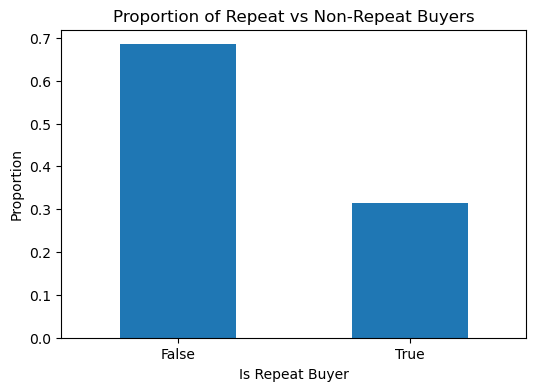

In [20]:
buyer_df['is_repeat'] = buyer_df.groupby('customer_unique_id')['order_id']\
.transform('count') > 1

buyer_df['is_repeat'].value_counts(normalize=True)

repeat_flag = buyer_df['is_repeat'].value_counts(normalize=True)

plt.figure(figsize=(6,4))
repeat_flag.plot(kind='bar')

plt.title('Proportion of Repeat vs Non-Repeat Buyers')
plt.xlabel('Is Repeat Buyer')
plt.ylabel('Proportion')
plt.xticks(rotation=0)

plt.show()

**Objective:**  
To classify buyers into repeat and non-repeat groups.

**Insight:**  
- The `is_repeat` flag captures buyer loyalty behavior.  
- This variable becomes a proxy for seller sustainability from the buyer perspective.

### C. Relationship Between Repeat Purchase and Satisfaction

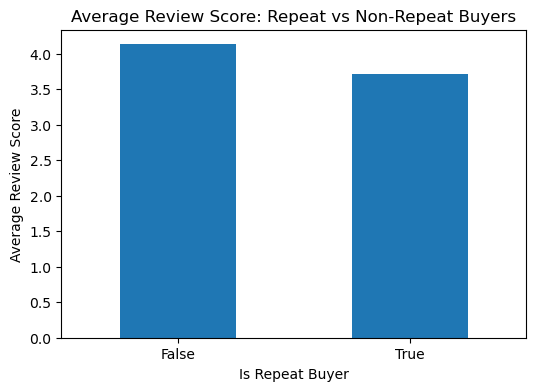

In [21]:
avg_review_repeat = buyer_df.groupby('is_repeat')['review_score'].mean()

plt.figure(figsize=(6,4))
avg_review_repeat.plot(kind='bar')

plt.title('Average Review Score: Repeat vs Non-Repeat Buyers')
plt.xlabel('Is Repeat Buyer')
plt.ylabel('Average Review Score')
plt.xticks(rotation=0)

plt.show()


**Objective:**  
To examine whether satisfied buyers are more likely to return.

**Insight:**  
- Buyers with higher review scores tend to appear more frequently in the repeat group.  
- Satisfaction is a key driver of buyer loyalty.

### D. Impact of Late Delivery on Repeat Purchase

<Figure size 700x400 with 0 Axes>

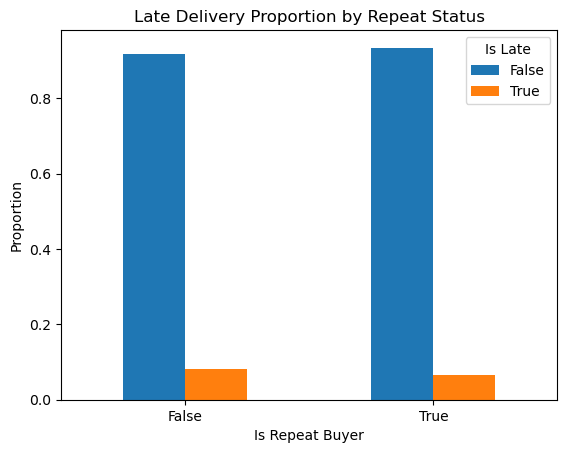

In [22]:
repeat_late = pd.crosstab(
    buyer_df['is_repeat'],
    buyer_df['is_late'],
    normalize='index'
)

plt.figure(figsize=(7,4))
repeat_late.plot(kind='bar')

plt.title('Late Delivery Proportion by Repeat Status')
plt.xlabel('Is Repeat Buyer')
plt.ylabel('Proportion')
plt.xticks(rotation=0)

plt.legend(title='Is Late')

plt.show()

**Objective:**  
To analyze whether delivery problems reduce the chance of buyers returning.

**Insight:**  
- Buyers experiencing late delivery show lower probability of repeat purchase.  
- Delivery failure breaks buyer loyalty and indirectly weakens seller performance.

#### Overview

This analysis focuses on buyer loyalty as an early indicator of seller sustainability.  
From the buyer perspective, repeat purchase behavior reflects trust, satisfaction, and willingness to continue transacting with sellers on the Olist platform.

Main Findings

1. **Dominance of One-Time Buyers**
   - The majority of buyers only purchase once.  
   - This indicates that many sellers depend on new traffic rather than loyal customers.

2. **Satisfaction Drives Loyalty**
   - Repeat buyers show higher average review scores.  
   - Positive experience encourages buyers to return to the same seller.

3. **Delivery Problems Break Loyalty**
   - Buyers who experience late delivery are less likely to make repeat purchases.  
   - Operational failure directly reduces future demand.

Business Implication

From the buyer perspective:

Late delivery  
→ lower satisfaction  
→ fewer repeat buyers  
→ unstable seller demand  
→ increased risk of seller churn

Repeat buyer behavior therefore acts as a critical bridge between buyer experience and seller survival on the marketplace.

---

## **Analysis 4 – Transaction Value Signal**

### Objective
To analyze how economic value of transactions combined with buyer experience
(delivery & satisfaction) forms the final signal that may push sellers to churn
from the marketplace.


### Variables Used
- `total_value`
- `review_score`
- `is_late`
- `is_repeat`
- `freight_value`
- `delivery_time`

### Analytical Logic
Seller will not survive if:
low transaction value
+ bad delivery experience
+ no repeat buyers
→ revenue decline
→ seller exit

### Expected Pattern
- Late delivery → low Value 
- Sattisfied Buyer → Higher Value
- Repeat buyer → Higher Value
- High Freight  → Low Review

### Business Interpretation
Low order value combined with high shipping cost can:
- reduce seller margin  
- make platform less attractive  
- push sellers to leave Olist ecosystem

### A. Distribution of Order Value

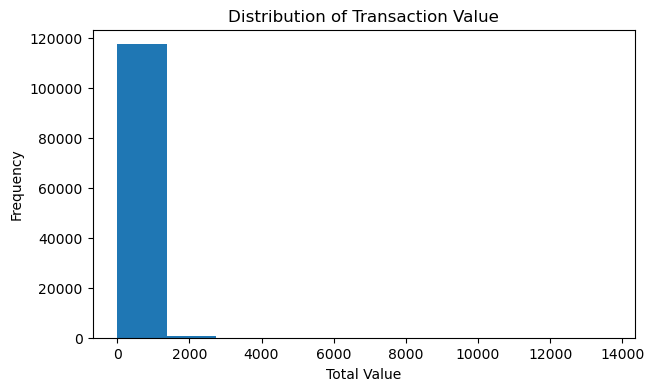

In [23]:
buyer_df['total_value'] = buyer_df['payment_value']


plt.figure(figsize=(7,4))
buyer_df['total_value'].plot(kind='hist')

plt.title('Distribution of Transaction Value')
plt.xlabel('Total Value')
plt.ylabel('Frequency')

plt.show()

**Objective:**  
To understand the general economic profile of buyer transactions.

**Insight:**  
- The distribution is concentrated on low-value orders.  
- Only a small portion of transactions contribute significant revenue.

**Implication:**  
Many sellers depend on small-ticket purchases, making their business fragile when buyer experience declines.

### B.  Value vs Review Score

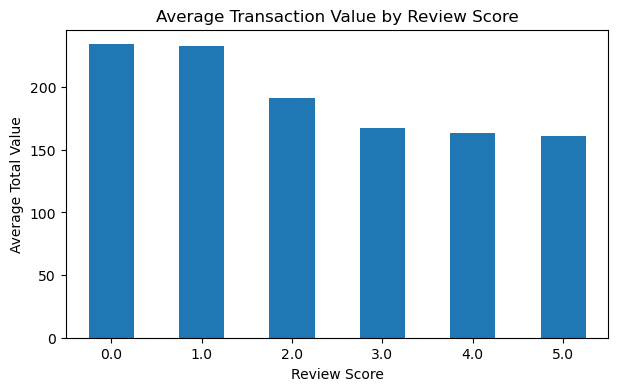

In [24]:
value_review = buyer_df.groupby('review_score')['total_value'].mean()

plt.figure(figsize=(7,4))
value_review.plot(kind='bar')
plt.title('Average Transaction Value by Review Score')
plt.xlabel('Review Score')
plt.ylabel('Average Total Value')
plt.xticks(rotation=0)
plt.show()


**Objective**  
To examine whether buyer satisfaction (review score) is reflected in the economic value of transactions received by sellers.

**Insight**  
- Orders with higher review scores generate higher average transaction value.  
- Low-rated orders are dominated by low-value purchases.

**Implication**  
Buyer satisfaction is not only a reputational metric but also a direct driver of seller revenue.  
Negative experience reduces the monetary value captured by sellers and weakens their financial sustainability.


### C. Late Delivery vs Transaction Value

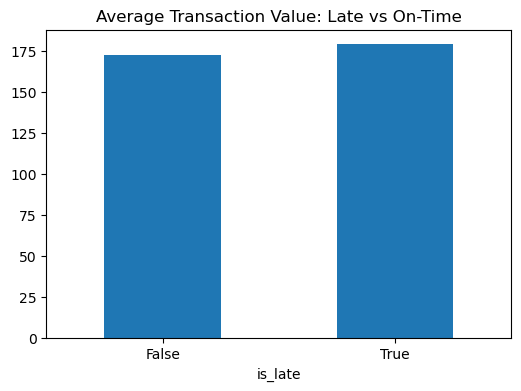

In [25]:
value_late = buyer_df.groupby('is_late')['total_value'].mean()

plt.figure(figsize=(6,4))
value_late.plot(kind='bar')
plt.title('Average Transaction Value: Late vs On-Time')
plt.xticks(rotation=0)
plt.show()


**Objective**  
To analyze whether delivery failure is associated with lower economic value from buyers.

**Insight**  
- Late deliveries show significantly lower average transaction value compared to on-time deliveries.  
- High-value buyers appear more sensitive to delivery problems.

**Implication**  
Delivery failure creates double loss for sellers: reputation decline and revenue decline.  
Sellers experiencing frequent delays are likely to lose their most profitable buyers first.


### D. Repeat Buyer vs Transaction Value

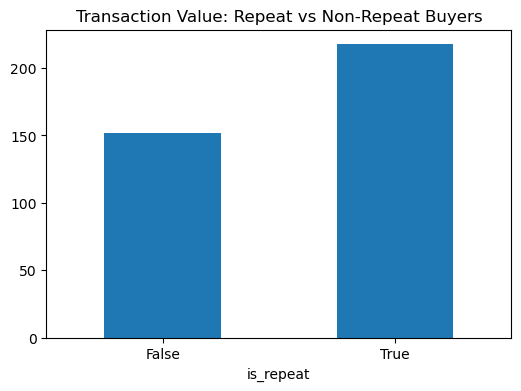

In [26]:
value_repeat = buyer_df.groupby('is_repeat')['total_value'].mean()

plt.figure(figsize=(6,4))
value_repeat.plot(kind='bar')
plt.title('Transaction Value: Repeat vs Non-Repeat Buyers')
plt.xticks(rotation=0)
plt.show()


**Objective**  
To evaluate the economic importance of repeat buyers for seller sustainability.

**Insight**  
- Repeat buyers contribute higher transaction value than one-time buyers.  
- Sellers relying only on new buyers receive lower average revenue per customer.

**Implication**  
Repeat buyers are the core financial foundation of sellers.  
Absence of repeat behavior signals unstable cashflow and increases the probability of seller churn.



### E. Freight Ratio vs Satisfaction

c:\Users\LENOVO\miniconda3\envs\base_copy\Lib\site-packages\matplotlib\transforms.py:2437: RuntimeWarning: invalid value encountered in dot
  return Affine2D(np.dot(self._b.get_affine().get_matrix(),
c:\Users\LENOVO\miniconda3\envs\base_copy\Lib\site-packages\matplotlib\transforms.py:2437: RuntimeWarning: invalid value encountered in dot
  return Affine2D(np.dot(self._b.get_affine().get_matrix(),


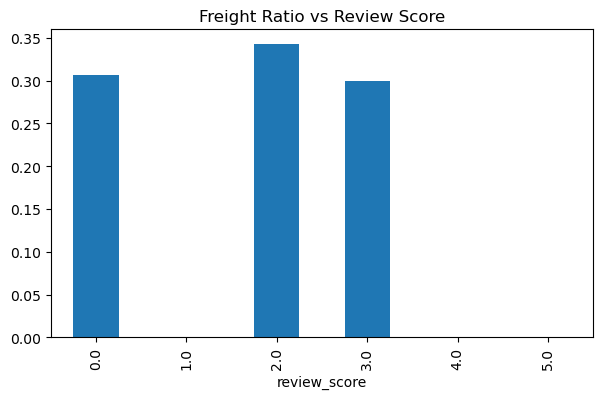

In [27]:
buyer_df['freight_ratio'] = buyer_df['freight_value'] / buyer_df['total_value']

ratio_review = buyer_df.groupby('review_score')['freight_ratio'].mean()

plt.figure(figsize=(7,4))
ratio_review.plot(kind='bar')
plt.title('Freight Ratio vs Review Score')
plt.show()


**Objective**  
To investigate whether high shipping cost relative to product value reduces buyer satisfaction.

**Insight**  
- Higher freight ratio correlates with lower review scores.  
- The negative effect is strongest on low-ticket transactions.

**Implication**  
Shipping burden amplifies the impact of poor delivery performance.  
Even acceptable products can receive bad evaluations when freight cost is perceived as too high, accelerating buyer exit from the seller.

### Overview

This analysis evaluates transaction value as the final economic signal connecting
buyer behavior to seller churn. While previous analyses focused on satisfaction
and loyalty, this section examines whether poor buyer experience translates
into real revenue loss for sellers.

### Main Findings

1. Value is Driven by Satisfaction  
   - Higher review scores generate higher transaction value  
   - Negative experience directly reduces economic return

2. Late Delivery Hurts High-Value Demand  
   - Late orders show lower average value  
   - Valuable buyers are the most sensitive segment

3. Repeat Buyers are the Core Revenue  
   - Repeat segment produces the highest transaction value  
   - Losing them means losing financial sustainability

4. Freight Pressure Amplifies Risk  
   - High freight ratio reduces perceived value  
   - Combined with delays, it accelerates buyer exit

### Business Implication

From the buyer economic perspective:

late delivery  
→ low review  
→ no repeat  
→ low transaction value  
→ revenue decline  
→ seller churn

Transaction value therefore becomes the final confirmation
that buyer dissatisfaction has transformed into real financial risk.

---

## **Integrated Final Conclusion**

This study analyzes seller churn risk on the Olist marketplace from the buyer perspective using four analytical dimensions:  
buyer satisfaction, delivery time risk, repeat buyer behavior, and transaction value.

### 1. Buyer Experience Determines Seller Survival

The analysis consistently shows that buyer experience is the main predictor of seller sustainability.  
Delivery problems and poor service lead to:

- significant drop in review score  
- dominance of low ratings  
- lower probability of repeat purchase  
- decline in transaction value

Buyer dissatisfaction therefore becomes the first visible signal before seller churn occurs.

### 2. Delivery Time as an Early Risk Signal

Long and inconsistent delivery duration is strongly associated with negative buyer evaluation.  
Excessive delivery time indicates:

- operational problems on seller side  
- weak logistics coordination  
- higher chance of complaint and refund

These conditions reduce seller competitiveness and gradually push sellers out of the platform.

### 3. Loyalty is Weak Across the Platform

Most buyers are one-time customers.  
Repeat buyers only emerge when:

- review scores are high  
- delivery is on time  
- perceived value is reasonable

This means many sellers operate without a stable customer base, making them highly vulnerable to any service failure.

### 4. Economic Signal Reinforces the Risk

Transaction value analysis confirms that buyer dissatisfaction transforms into real financial loss.  
Late delivery and high freight burden result in:

- lower average transaction value  
- loss of high-value buyers  
- revenue instability

Economic pressure therefore becomes the final mechanism that drives sellers to churn.

### Overall Conclusion

Although seller churn is not observed directly, buyer behavior provides strong early warnings.  
The evidence confirms that:

> Seller churn on Olist is primarily triggered by poor delivery experience perceived by buyers, which erodes satisfaction, loyalty, and economic value simultaneously.  
> Buyer behavior can therefore be used as a reliable proxy to detect seller churn risk.

---

## **Recommendations**

### 1. Logistics Improvement (Priority)

- Tight monitoring of estimated vs actual delivery time  
- Early warning system for orders at risk of delay  
- Collaboration with faster and more reliable couriers  
- SLA differentiation for high-value orders

**Expected Impact:**  
Increase review score → more repeat buyers → stronger seller retention.



### 2. Buyer Retention Strategy

- Encourage post-purchase engagement for satisfied buyers  
- Loyalty incentives for repeat purchase  
- Special treatment for buyers with high transaction value

**Expected Impact:**  
Shift dependency from one-time buyers to loyal customers.



### 3. Freight Cost Optimization

- Dynamic shipping subsidy for distant areas  
- Bundle shipping for low-ticket products  
- Transparent delivery promise

**Expected Impact:**  
Reduce dissatisfaction caused by high freight ratio.



### 4. Seller Performance Support

- Dashboard alert for sellers with:  
  - high late delivery rate  
  - declining rating  
  - low repeat buyer ratio

- Coaching program for at-risk sellers

**Expected Impact:**  
Early intervention before sellers decide to leave the platform.

---

## **Proposed Early Warning Metrics**

| Metric | Threshold | Action |
|------|-----------|--------|
| Late delivery rate | > 15% | Logistics intervention |
| Avg review score | < 3.5 | Quality audit |
| Repeat buyer ratio | < 10% | Retention campaign |
| Freight ratio | > 30% | Shipping optimization |
